Importing the required libraries

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)

# location of training directory and validation directory
train_directory = 'dataset/training'
validation_directory = 'dataset/validation'

# Controlled Variables
img_height = 200
img_width = 200
batch_size = 32

In [3]:
# Creating the training and validation dataset with labels

training_ds = train.flow_from_directory(
    train_directory,
    target_size = (img_height,img_width),
    batch_size = batch_size,
    class_mode = 'binary')

validation_ds = validation.flow_from_directory(
    validation_directory,
    target_size = (img_height,img_width),
    batch_size = batch_size,
    class_mode = 'binary')

Found 1978 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [4]:
print('Training Indices:',training_ds.class_indices)
print('Validation Indices:',validation_ds.class_indices)

Training Indices: {'fire': 0, 'no_fire': 1}
Validation Indices: {'fire': 0, 'no_fire': 1}


In [6]:
model = Sequential([
    # Three convolution layers because the image is a bit large
    # First Convolution
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape =(img_height,img_width,3)),
    keras.layers.MaxPool2D(2,2),
    # Second Covolution
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    # Third Convolution
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    # Flattening the results
    keras.layers.Flatten(),

    # Hidden Layers
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [7]:
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(learning_rate = 0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    training_ds,
    epochs = 10,
    validation_data = validation_ds
)

Epoch 1/10


2022-02-28 20:30:00.588008: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


62/62 [==============================] - 17s 203ms/step - loss: 1.1170 - accuracy: 0.7255 - val_loss: 0.3973 - val_accuracy: 0.8423
Epoch 2/10
62/62 [==============================] - 12s 198ms/step - loss: 0.4455 - accuracy: 0.8145 - val_loss: 0.3692 - val_accuracy: 0.8288
Epoch 3/10
62/62 [==============================] - 12s 189ms/step - loss: 0.3725 - accuracy: 0.8438 - val_loss: 0.4540 - val_accuracy: 0.8333
Epoch 4/10
62/62 [==============================] - 12s 190ms/step - loss: 0.3385 - accuracy: 0.8640 - val_loss: 0.2916 - val_accuracy: 0.8829
Epoch 5/10
62/62 [==============================] - 11s 172ms/step - loss: 0.3104 - accuracy: 0.8701 - val_loss: 0.2958 - val_accuracy: 0.8874
Epoch 6/10
62/62 [==============================] - 11s 180ms/step - loss: 0.2590 - accuracy: 0.8979 - val_loss: 0.2544 - val_accuracy: 0.9189
Epoch 7/10
62/62 [==============================] - 11s 182ms/step - loss: 0.2315 - accuracy: 0.9065 - val_loss: 0.6773 - val_accuracy: 0.7207
Epoch 8/10

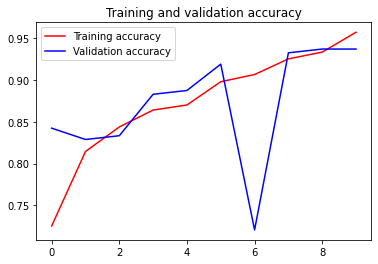

<Figure size 432x288 with 0 Axes>

In [9]:
# Plotting the graph for Training and Validation Accuracy with epochs

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [10]:
# Saving the model

model.save('saved_model')

2022-02-28 20:32:27.641385: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/assets
